## Introduction

This notebook illustrates how to checkout, compile and run the SelfForce-1D code. The code uses the python based SCons for building the code and in addition to what is done in this notebook it requires GSL, BLAS and LAPACK to be installed.

## Notebook setup
This notebook is intended to be used online on the Einstein Toolkit tutorial server, offline as a read-only document, as a jupyter notebook that you can download and also in your own docker container using `ndslabs/jupyter-et`. To make all of these work some setting need to be tweaked, which we do in the next cell.

In [26]:
# this allows you to use "cd" in cells to change directories instead of requiring "%cd"
%automagic on
# override IPython's default %%bash to not buffer all output
from IPython.core.magic import register_cell_magic
@register_cell_magic
def bash(line, cell): get_ipython().system(cell)
@register_cell_magic
def slurm(line, cell):
    sbash = os.path.join(os.environ["HOME"],".slurm.sh")
    with open(sbash, "w") as fd:
        fd.write(cell)
    call(["bash",sbash])
# Some versions of OpenMPI prevent oversubscribing cpus, which may happen if simfactory's
# number of cores detection is imperfect.
# OpenMPI by default pins MPI ranks to specific cores, which causes issues on shared
# system like the tutorial cluster.
import os
os.environ["OMPI_MCA_rmaps_base_oversubscribe"] = "true"
os.environ["OMPI_MCA_hwloc_base_binding_policy"] = "none"
import scrolldown
import re
from subprocess import call
@register_cell_magic
def slurm(line, cell):
    sbash = os.path.join(os.environ["HOME"],".slurm.sh")
    with open(sbash, "w") as fd:
        fd.write(cell)
    opts = re.split(r'\s+',line.strip())
    call(["srun"]+opts+["bash",sbash])


Automagic is ON, % prefix IS NOT needed for line magics.


## Download

Download is done simply by doing a git clone from the bitbucket repository.

In [2]:
cd ~/

/home/sbrandt


In [3]:
%%bash
rm -fr selfforce-1d Examples

Download the code from bitbucket.

In [4]:
%%bash
git clone https://peterdiener@bitbucket.org/peterdiener/selfforce-1d.git

Cloning into 'selfforce-1d'...
Receiving objects: 100% (3054/3054), 17.54 MiB | 7.76 MiB/s, done.
Resolving deltas: 100% (1236/1236), done.


Take a look at the home directory. The SelfForce-1D code should now be in selfforce-1d.

In [5]:
ls

Cactus/                          Selfforce-1D.ipynb*
CactusSourceJar.git/             SimpleMaxwell_CactusAndDesignIntro.ipynb*
CactusTutorial.ipynb             SimpleMaxwell_MaxwellSystemAndAlgorithm.ipynb*
CactusTutorialSpack.ipynb*       SimpleMaxwell_Parfile.ipynb*
CoReDB_tutorial/                 UsingTheCactusReductionInterface.ipynb
CreatingANewThorn-HeatEqn.ipynb  VisualizingOutput-WaveMoL.ipynb
CreatingANewThorn-WaveEqn.ipynb  einsteintoolkit.th
GetComponents*                   engrenage/
Giacomazzo_ETK_2021.ipynb*       selfforce-1d/
Maria_July2021_ETKTalk.ipynb     simulations/
OscillatonEvolution.ipynb        slurmjupyter.ini


## Compilation

Go into the selfforce-1d directory.

In [6]:
cd selfforce-1d

/home/sbrandt/selfforce-1d


The SConstruct file contains information about how to build the code with SCons. Here we use SConstruct.fedora. On systems where GSL, BLAS and LAPACK are not installed in standard locations, The SConstruct file will have to be modified appropriately to tell SCons about the location of libraries and include files.

In [7]:
cp SConstruct.fedora SConstruct

If SCons is not available, we can install it in user space with pip.

In [8]:
%%bash
# Note that the executable "scons" is installed in ~/.local/bin, so you might need to add that to your path.
python3 -m pip install --user scons

For nicer looking output from SCons, we also install termcolor with pip.

In [9]:
%%bash
python3 -m pip install --user termcolor

The default Ubuntu gfortran installations seem to, for some unknown reason, encounter internal compiler errors when compiling SelfForce-1D. Therefore, we have installed the alternate 10.3.0 compiler.

In [11]:
%%bash
cd ~/selfforce-1d
which gfortran
gfortran --version

/usr/bin/gfortran
GNU Fortran (Ubuntu 10.3.0-1ubuntu1~20.04) 10.3.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Launch the compilation with SCons. It appears that the environment is local to each cell, so we have to set it up again. All the warnings with Nonexistent include directories can be ignored. These include directories are created during the build process and will be there next time you compile.

In [12]:
cd ~/selfforce-1d

/home/sbrandt/selfforce-1d


In [15]:
%%slurm -n 1
scons

scons: Reading SConscript files ...
scons: done reading SConscript files.
scons: Building targets ...
Generating Build/EffSource/RWZSchwarzschild/EffectiveSource/WignerD0.h
Generating Build/EffSource/RWZSchwarzschild/EffectiveSource/WignerD1.h
Generating Build/EffSource/RWZSchwarzschild/EffectiveSource/WignerD2.h
Generating Build/EffSource/RWZSchwarzschild/EffectiveSource/WignerD3.h
Generating Build/EffSource/RWZSchwarzschild/EffectiveSource/WignerD4.h
Compiling Build/EffSource/ScalarSchwarzschild/EffectiveSource/EffectiveSource-acceleration.o
Generating Build/EffSource/ScalarSchwarzschild/EffectiveSource/WignerD0.h
Generating Build/EffSource/ScalarSchwarzschild/EffectiveSource/WignerD1.h
Generating Build/EffSource/ScalarSchwarzschild/EffectiveSource/WignerD2.h
Generating Build/EffSource/ScalarSchwarzschild/EffectiveSource/WignerD3.h
Generating Build/EffSource/ScalarSchwarzschild/EffectiveSource/WignerD4.h
Compiling Build/EffSource/ScalarSchwarzschild/EffectiveSource/WignerDMatrix.o
Co

Compiling Build/Equations/Analytic/CircularAccelerated/module_analytic_circular_orbit.o
f951: Warning: Nonexistent include directory 'Build/Time' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Equations/ODE/OsculatingSchwarzschild' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSingular' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/MoL/ABMV5' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Numerics' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/MoL/RK5' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSelfForce' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZStrain' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Equations/ODE/GeodeticSchwarzschild' [-Wmissing-include-dirs]
f951: Warning: Nonexistent includ

Compiling Build/Equations/Analytic/CircularAccelerated/submodule_analytic_circular_orbit_implementation.o
f951: Warning: Nonexistent include directory 'Build/Equations/ODE/OsculatingSchwarzschild' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSingular' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/MoL/ABMV5' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/MoL/RK5' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSelfForce' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZStrain' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Equations/ODE/GeodeticSchwarzschild' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZMetric' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/MoL' [-Wmissing-include-dirs]
f951:

Compiling Build/MoL/module_all_integrators.o
f951: Warning: Nonexistent include directory 'Build/Equations/ODE/OsculatingSchwarzschild' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSingular' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSelfForce' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZStrain' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZMetric' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZFlux' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers' [-Wmissing-include-dirs]
Compiling Build/Equations/ODE/GeodeticSchwarzschild/submodule_geod_schw_implementation.o
f951: Warning: Nonexistent include directory 'Build/Equations/ODE/OsculatingSchwarzschild' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'B

Compiling Build/Grid/Element/submodule_element_implementation.o
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSingular' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZStrain' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZMetric' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZFlux' [-Wmissing-include-dirs]
Compiling Build/Grid/GridFunction/submodule_grid_function_implementation.o
f951: Warning: Nonexistent include directory 'Build/Observers/ScalarSingular' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZStrain' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZMetric' [-Wmissing-include-dirs]
f951: Warning: Nonexistent include directory 'Build/Observers/RWZFlux' [-Wmissing-include-dirs]
Compiling Build/MoL/ABMV5/submodule_abmv5_implementation.o
f951: Warnin

Compiling Build/SelfForce/submodule_acceleration_history_implementation.o
Compiling Build/WorldTube/submodule_world_tube_implementation.o
Compiling Build/Main/Schwarzschild/accel_history_test.o
Linking Build/Exe/accel_history_test.x
Compiling Build/Main/Schwarzschild/accel_test.o
Linking Build/Exe/accel_test.x
Compiling Build/Main/Schwarzschild/rwz.o
Linking Build/Exe/rwz.x
Compiling Build/Main/Schwarzschild/test.o
Linking Build/Exe/test.x
scons: done building targets.


The executable (test.x) should be in the Build/Exe directory, so we take a look to make sure. The other executables are for testing purposes and can be ignored.

## Running the code

In the following we will run the code for a couple of different setups and visualize some of the output.

First change back to your home directory.

In [16]:
cd ..

/home/sbrandt


Then create a directory for the examples.

In [17]:
mkdir -p Examples

Go into the Examples directory.

In [18]:
cd Examples

/home/sbrandt/Examples


Create a directory for the example with a Gaussian initial scalar field profile and no particle source.

In [19]:
mkdir -p ScalarGaussian10

Go into the ScalarGaussian10 directory.

In [20]:
cd ScalarGaussian10

/home/sbrandt/Examples/ScalarGaussian10


Now we create a parameter file. The code uses Fortrans namelist feature and require the parameter file to start with &params (denotes which namelist to read) and end with a / (to indicate the end of the namelist). Some of the important parameters here are: n_elems (we use 32 DG elements), order (we use 10th order elements), r_center (the Gaussian initial data profile is centered at r=10), lmin (we evolve from l=0), lmax (we evolve to l=2), t_initial (we start at t=0), t_final (we end at t=1000), sigma (the width of the Gaussian profile), amplitude (the amplitude of the Gaussian), use_field_observer (activate an observer to extract the field at the horizon and future null infinity).

In [21]:
%%writefile scalargaussian_o10.par
&params
equation_name = 'scalar_schwarzschild'
n_elems = 32
order = 10
Sminus = -20.0
r_center = 10.0
mass = 1.0
lmin = 0
lmax = 2
t_initial = 0.0
t_final = 1000.0
sigma = 1.0
amplitude = 1.0
use_field_observer = .true.
out0d_every = 20
out1d_every = 57
/

Writing scalargaussian_o10.par


Run the code. Note we again have to setup the environment to use the 8.4.0 versions of the compilers. We also set the code to use just one thread. This should finish in a little bit less than 40 seconds.

In [27]:
%%slurm -n 1
export OMP_NUM_THREADS=1
../../selfforce-1d/Build/Exe/test.x scalargaussian_o10.par

 p_orb =    10.000000000000000     
 ecc =    0.0000000000000000     
 rho_min =   -20.000000000000000     
 rstar_center =    12.772588722239782     
 delta_rstar =    2.0482867951399863     
 rho_max =    45.545177444479563     
 Tminus =    2.5311547465398494     
 Tminus_ind =           11          12
 Tplus =    23.014022697939716     
 Tplus_ind =           21          22
 rho(Tminus_ind(1)) =    2.5311547465398512     
 rho(Tminus_ind(2)) =    2.5311547465398512     
 rho(Tplus_ind(1)) =    23.014022697939716     
 rho(Tplus_ind(2)) =    23.014022697939716     
 delta_rho_min =    6.7591999296649163E-002
 rho%vname = rho
 equation_name = scalar_schwarzschild            
 n_elems =           32
 order =           10
 scalar schwarzschild init called
 Allocating            1  grid functions for temporary storage
 Scal_Schw initialized
 my_eq%eq_data(1,1)%vname = psi.1   
 my_eq%eq_data(2,1)%vname = rho.1   
 my_eq%eq_data(3,1)%vname = pi.1    
 Opening r_schw.asc with id          

Take a look at the files produced by the code. The files with extract in the name is time series data produced by the observer. Files with 1 in the name is for the l=0,m=0 mode. With 2 is for l=1,m=1, with 3 is for l=2,m=0 and with 4 is for l=2,m=2. Note that due to symmetries in the Schwarzschild space time we only need to evolve modes with l+m even. The files without extract in the name is 1D data.

In [49]:
cd ~/Examples/ScalarGaussian10

/home/sbrandt/Examples/ScalarGaussian10


In [50]:
ls

pi.1.asc          pi.4.extract.asc   psi.4.asc          rho.3.asc
pi.1.extract.asc  psi.1.asc          psi.4.extract.asc  rho.3.extract.asc
pi.2.asc          psi.1.extract.asc  r_schw.asc         rho.4.asc
pi.2.extract.asc  psi.2.asc          rho.1.asc          rho.4.extract.asc
pi.3.asc          psi.2.extract.asc  rho.1.extract.asc  scalargaussian_o10.par
pi.3.extract.asc  psi.3.asc          rho.2.asc
pi.4.asc          psi.3.extract.asc  rho.2.extract.asc


Import numpy.

In [51]:
import numpy as np

Read in the time series data for l=0,m=0, l=1,m=1 and l=2,m=2.

In [52]:
psidatal0 = np.loadtxt("psi.1.extract.asc", comments='#')
psidatal1 = np.loadtxt("psi.2.extract.asc", comments='#')
psidatal2 = np.loadtxt("psi.4.extract.asc", comments='#')

Take a look at l=0,m=0. The file has 5 columns. The first is time. The second and third are the real and imaginary components of the field at the horizon. The fourth and fifth are the real and imaginary components at future null infinity. Note, that the initial data was real, so the imaginary components are zero at all times.

In [53]:
print(psidatal0)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 6.75919993e-01  8.47205781e-19  0.00000000e+00 -2.01460841e-33
   0.00000000e+00]
 [ 1.35183999e+00 -1.83006607e-17  0.00000000e+00 -2.98002115e-30
   0.00000000e+00]
 ...
 [ 9.98333830e+02 -1.13932689e-07  0.00000000e+00 -1.42454050e-05
   0.00000000e+00]
 [ 9.99009750e+02 -1.13694903e-07  0.00000000e+00 -1.42252241e-05
   0.00000000e+00]
 [ 9.99685670e+02 -1.13457778e-07  0.00000000e+00 -1.42050861e-05
   0.00000000e+00]]


Extract data into variables with more descriptive names.

In [54]:
times=psidatal0[:,0]
psil0horizon=psidatal0[:,1]
psil0scri=psidatal0[:,3]
psil1horizon=psidatal1[:,1]
psil1scri=psidatal1[:,3]
psil2horizon=psidatal2[:,1]
psil2scri=psidatal2[:,3]

Install mpld3 in user space for better control of in cell plots with mathplotlib.

In [55]:
%%bash
python3 -m pip install --user mpld3

Import mathplotlib and mpld3 and use it as a backend for mathplotlib. Also set some parameter for font size and plot size.

In [56]:
import mpld3
mpld3.enable_notebook()

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.5, 7]
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

Plot the l=0,m=0 mode in a log-log plot, both at the horzon and future null infinity. Make sure that the late time decay follows a power law with an index of -3 (formula is -(2l+3)) at the horizon and -2 (formula is -(l+2)) at future null infinity.

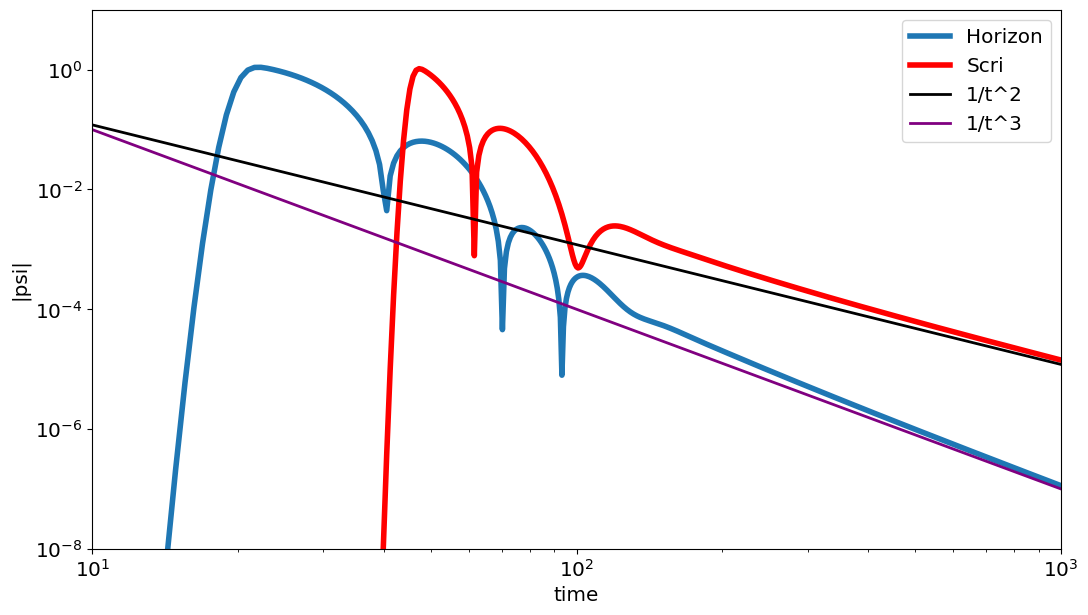

In [57]:
plt.plot(times, abs(psil0horizon), linewidth=4, label='Horizon')
plt.legend()
plt.plot(times, abs(psil0scri), linewidth=4, color='red', label='Scri')
plt.legend()
plt.plot(times[1:-1],12*times[1:-1]**(-2), linewidth=2, color='black', label='1/t^2')
plt.legend()
plt.plot(times[1:-1],100*times[1:-1]**(-3), linewidth=2, color='purple', label='1/t^3')
plt.legend()
plt.xlim([10,1000])
plt.ylim([1e-8,10])
plt.xlabel('time')
plt.ylabel('|psi|')
plt.xscale('log')
plt.yscale('log')
plt.show()

Plot the l=1,m=1 mode in a log-plot and focus on the quasinormal ringdown part. Both the horizon and future null infinity show the same QNM frequencies (as expected) that agree with the expected frequencies as computed by Emanuele Berti (https://pages.jh.edu/~eberti2/ringdown/).

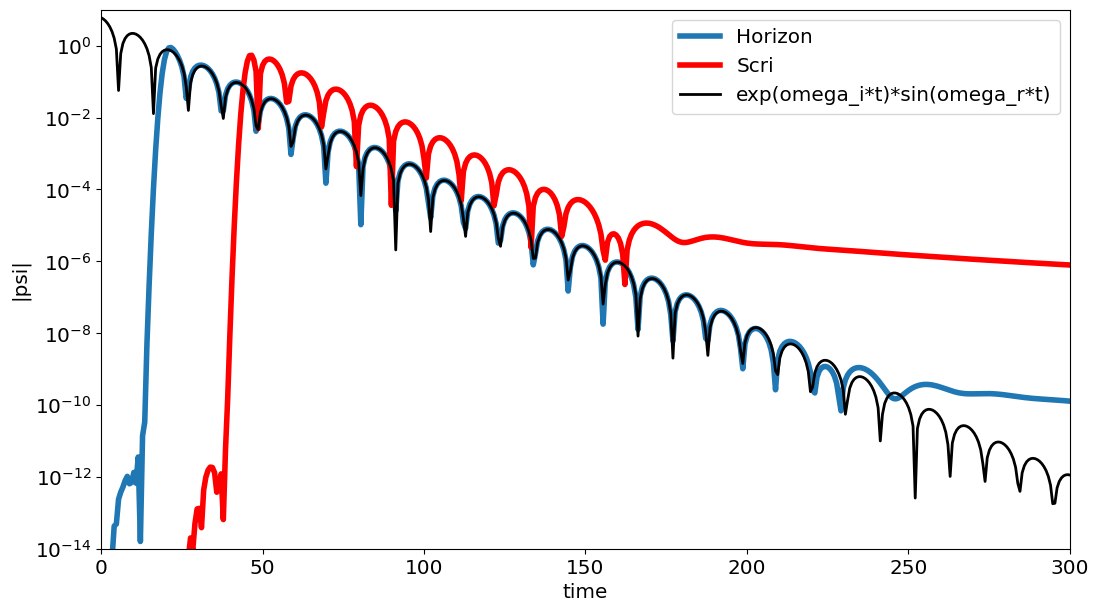

In [58]:
plt.plot(times, abs(psil1horizon), linewidth=4, label='Horizon')
plt.legend()
plt.plot(times, abs(psil1scri), linewidth=4, color='red', label='Scri')
plt.legend()
plt.plot(times, 6*abs(np.exp(-.9765998891e-01*times)*np.sin(0.2929361333*times-1.6)), linewidth=2, color='black', label='exp(omega_i*t)*sin(omega_r*t)')
plt.legend()
plt.xlim([0,300])
plt.ylim([1e-14,10])
plt.xlabel('time')
plt.ylabel('|psi|')
plt.yscale('log')
plt.show()

Plot the l=1,m=1 mode in a log-log plot, both at the horzon and future null infinity. Make sure that the late time decay follows a power law with an index of -5 (formula is -(2l+3)) at the horizon and -3 (formula is -(l+2)) at future null infinity.

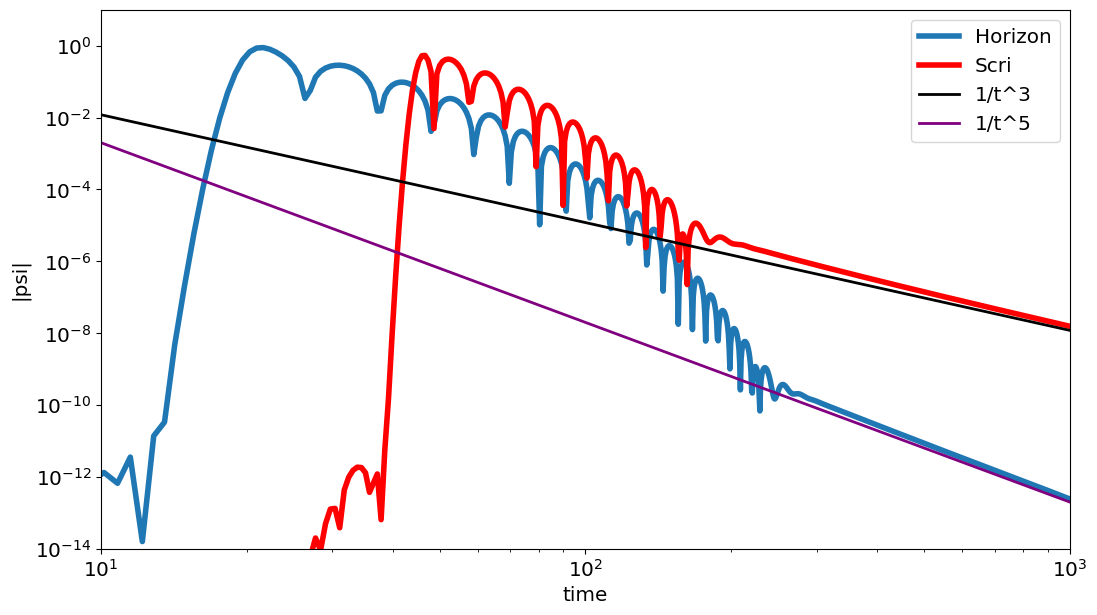

In [59]:
plt.plot(times, abs(psil1horizon), linewidth=4, label='Horizon')
plt.legend()
plt.plot(times, abs(psil1scri), linewidth=4, color='red', label='Scri')
plt.legend()
plt.plot(times[1:-1],12*times[1:-1]**(-3), linewidth=2, color='black', label='1/t^3')
plt.legend()
plt.plot(times[1:-1],200*times[1:-1]**(-5), linewidth=2, color='purple', label='1/t^5')
plt.legend()
plt.xlim([10,1000])
plt.ylim([1e-14,10])
plt.xlabel('time')
plt.ylabel('|psi|')
plt.xscale('log')
plt.yscale('log')
plt.show()

Plot the l=2,m=2 mode in a log-plot and focus on the quasinormal ringdown part. Both the horizon and future null infinity show the same QNM frequencies (as expected) that agree with the expected frequencies as computed by Emanuele Berti.

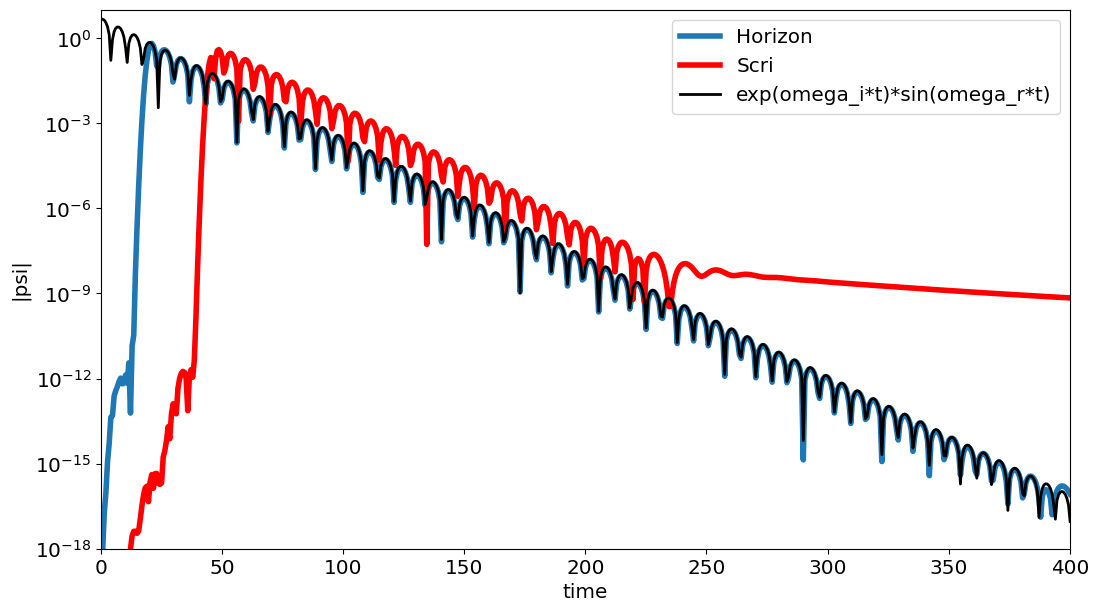

In [60]:
plt.plot(times, abs(psil2horizon), linewidth=4, label='Horizon')
plt.legend()
plt.plot(times, abs(psil2scri), linewidth=4, color='red', label='Scri')
plt.legend()
plt.plot(times, 5*abs(np.exp(-.9675877598e-01*times)*np.sin(0.4836438722*times-2.01)), linewidth=2, color='black', label='exp(omega_i*t)*sin(omega_r*t)')
plt.legend()
plt.xlim([0,400])
plt.ylim([1e-18,10])
plt.xlabel('time')
plt.ylabel('|psi|')
plt.yscale('log')
plt.show()

Plot the l=2,m=2 mode in a log-log plot, both at the horzon and future null infinity. At the horizon the power law index should be -7 (formula is -(2l+3)) but the QNM phase lasts so long (field amplitude drops 15 orders of magnitude) that we are dominated by roundoff error at that time. We still the the correct pwoer law tail decay of -4 (formula is -(l+2)) at future null infinity.

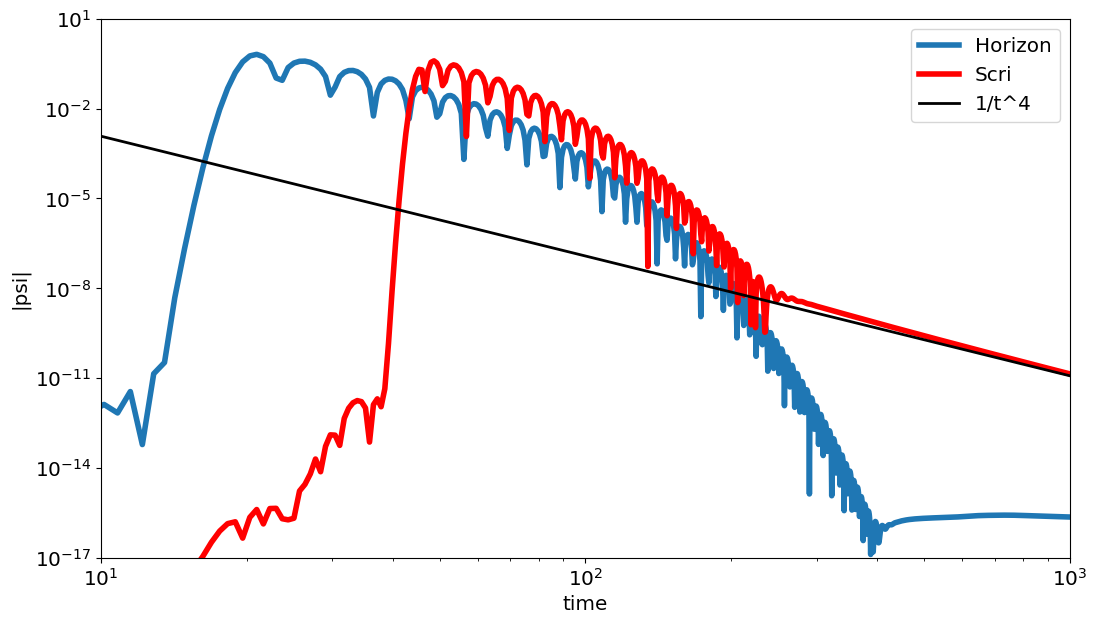

In [61]:
plt.plot(times, abs(psil2horizon), linewidth=4, label='Horizon')
plt.legend()
plt.plot(times, abs(psil2scri), linewidth=4, color='red', label='Scri')
plt.legend()
plt.plot(times[1:-1],12*times[1:-1]**(-4), linewidth=2, color='black', label='1/t^4')
plt.legend()
plt.xlim([10,1000])
plt.ylim([1e-17,10])
plt.xlabel('time')
plt.ylabel('|psi|')
plt.xscale('log')
plt.yscale('log')
plt.show()

Now let's try an example with a particle source. So back up the the Examples directory.

In [62]:
cd ..

/home/sbrandt/Examples


Create a directory for a scalar charged particle moving along an eccentric orbit around a Schwarzschild black hole.

In [63]:
mkdir ScalarElliptic6

mkdir: cannot create directory ‘ScalarElliptic6’: File exists


And change into it.

In [64]:
cd ScalarElliptic6

/home/sbrandt/Examples/ScalarElliptic6


Create a parameter file for this case. Note that we use more elements (in order to resolve smaller features) but lower order. We also evolve up to l=5. The particle orbit is an eccentric geodesic with semi-latus rectum p=9.9 and eccentricity e=0.5. We activate the particle by setting use_particle = .true.. We use initial data (located in Steve Brandts' home directory) for l=0 to l=2. A lot more parameters have to be set to setup the different coordinate regions as well as the world-tube where the effective source is non-zero.

In [65]:
%%bash
tar xzvf /usr/local/data/Initial_Data.tgz

./Initial_Data/
./Initial_Data/SSF_init_data_p9.9_e0.5_n6_l2m0.dat
./Initial_Data/SSF_init_data_p9.9_e0.5_n6_l1m1.dat
./Initial_Data/SSF_init_data_p9.9_e0.5_n6_l0m0.dat
./Initial_Data/SSF_init_data_p9.9_e0.5_n6_l2m2.dat


In [66]:
%%writefile scalarelliptic_o6.par
&params
equation_name = 'scalar_schwarzschild'
n_elems = 128
order = 6
Sminus = -30.0
p_orb = 9.9
ecc = 0.5
t_size = 25
use_particle = .true.
mass = 1.0
lmin = 0
lmax = 5
gaussian_center = 10.0
t_initial = 0.0
t_final = 600
use_world_tube = .true.
use_generic_orbit = .true.
use_osculating_orbit = .true.
world_tube_width = 4
use_exact_initial_data = .true.
exact_initial_data_lmax = 2
input_directory = './Initial_Data'
input_basename = 'SSF_init_data_p9.9_e0.5_n6'
phi_initial = 5.06938549736
turn_on_source_smoothly = .false.
tsigma = 1e-6
torder = 4
out0d_every = 20
out1d_every = -1
q_charge = 0.125
q_mass = 1.0
evolve_orbit = .false.
fit_high_l = .false.
output_coords_for_exact = .false.
/

Overwriting scalarelliptic_o6.par


Run this example. Note this takes almost 40 minutes to run, so do this at your leisure and look at the results later. 

In [ ]:
%%slurm -n 1
export OMP_NUM_THREADS=1
../../selfforce-1d/Build/Exe/test.x scalarelliptic_o6.par

 p_orb =    9.9000000000000004     
 ecc =   0.50000000000000000     
 rho_min =   -30.000000000000000     
 rmin =    6.6000000000000005     
 rmax =    19.800000000000001     
 rstar_center =    16.645533195482209     
 delta_rstar =   0.72883645617940951     
 rho_max =    63.291066390964417     
 Tminus =   -1.5753782090030306     
 Tminus_ind =           39          40
 Tplus =    34.866444599967451     
 Tplus_ind =           89          90
 rho(Tminus_ind(1)) =   -1.5753782090030306     
 rho(Tminus_ind(2)) =   -1.5753782090030306     
 rho(Tplus_ind(1)) =    34.866444599967451     
 rho(Tplus_ind(2)) =    34.866444599967451     
 delta_rho_min =    6.1869506890136705E-002
 Initializing orbit with p =    9.9000000000000004       and e =   0.50000000000000000     
 rho%vname = rho
 equation_name = scalar_schwarzschild            
 n_elems =          128
 order =            6
 scalar schwarzschild init called
 Allocating            1  grid functions for temporary storage
 nmodes =

Read in the r-component of the self-force extracted at the particle location.

In [ ]:
frdata = np.loadtxt("Schwarzschild_wave.frl.asc", comments='#')

First column is time while the remaining columns contains the extracted self-force for each l (summed over all m).

In [ ]:
times=frdata[:,0]
frl0=frdata[:,1]
frl1=frdata[:,2]
frl2=frdata[:,3]
frl3=frdata[:,4]
frl4=frdata[:,5]
frl5=frdata[:,6]

Plot the radial component of the self-force as function of time for each l-mode. Note that beyond l=2, we start to see the convergence of the mode sum. The amplitude of each l-mode is expected to decrease with l as $l^{-2}$.

In [ ]:
plt.plot(times, abs(frl0), linewidth=2, label='l=0')
plt.legend()
plt.plot(times, abs(frl1), linewidth=2, color='red', label='l=1')
plt.legend()
plt.plot(times, abs(frl2), linewidth=2, color='blue', label='l=2')
plt.legend()
plt.plot(times, abs(frl3), linewidth=2, color='green', label='l=3')
plt.legend()
plt.plot(times, abs(frl4), linewidth=2, color='orange', label='l=4')
plt.legend()
plt.plot(times, abs(frl5), linewidth=2, color='pink', label='l=4')
plt.legend()
plt.xlim([0,600])
plt.ylim([1e-9,1e-3])
plt.xlabel('time')
plt.ylabel('F_r')
plt.yscale('log')
plt.show()

Read in the orbit data.

In [ ]:
orbitdata = np.loadtxt("osc_orbit.asc", comments='#')

Extract the radius and the phi-coordinate from columns 15 and 3, respectively.

In [ ]:
radius=orbitdata[:,14]
phi=orbitdata[:,2]

Plot the orbit in the xy-plane.

In [ ]:
plt.plot(radius*np.sin(phi), radius*np.cos(phi), linewidth=2, label='orbit')
plt.legend()
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show()